# DIABETES PREDICTION USING PERCEPTRON

### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/LEGION/Documents/diabetes.csv")
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
#Intial summary of dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
#Check the NA data in the table 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Important Observation(s):
.It seems like null values are present in the form of zeros.

.It's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. So, we have to handle this.

.Let's get a sense of how many zero value are present in each column.

In [7]:
zero_not_present = ["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in zero_not_present:
    data[col].replace(0,np.nan,inplace=True)


#checkf if zeros were replaced in required columns    
data.head(n=10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

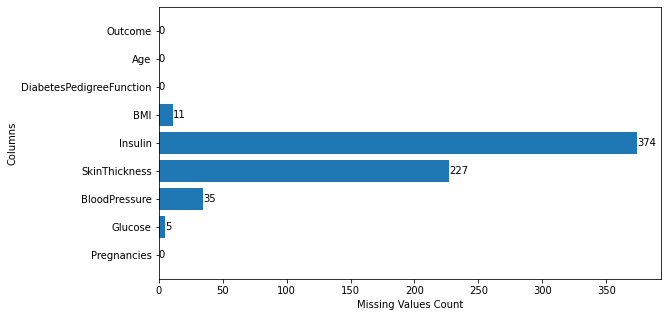

In [8]:
missing_values_count = data.isna().sum()

# Create a bar plot
plt.figure(figsize=(9, 5))
plt.barh(missing_values_count.index, missing_values_count)
plt.xlabel('Missing Values Count')
plt.ylabel('Columns')
plt.grid(False)

# Add labels to the bars
for index, value in enumerate(missing_values_count):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

### Performing Mean Imputation on the Columns with NA

In [9]:
data.fillna(data.mean(), inplace=True) 

In [10]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.400000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### We can see the Mean values for Glucose, BloodPressure, SkinThickness, Insulin, BMI has changed

### Pregnancies with outcome


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

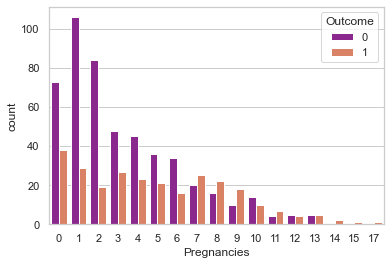

In [111]:
import random
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
sns.countplot(x="Pregnancies", hue = "Outcome", data=data, palette=random.choice(pallete))

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

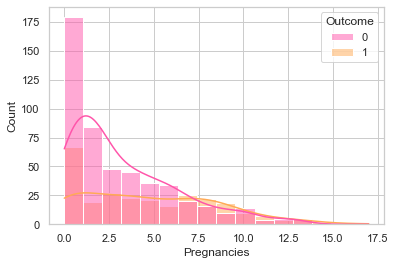

In [112]:
sns.histplot(x="Pregnancies", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

##### We can see as number  of pregnacies increase, more chance of being diabetic

### Blood Pressure with Outcome

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

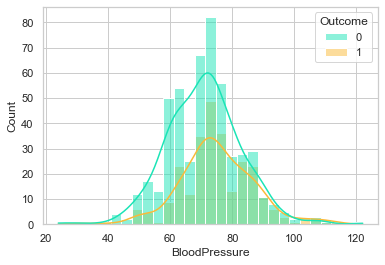

In [113]:
sns.histplot(x="BloodPressure", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

##### we can see that blood pressure levels of diabetic people are high

### Glucose with Outcome

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

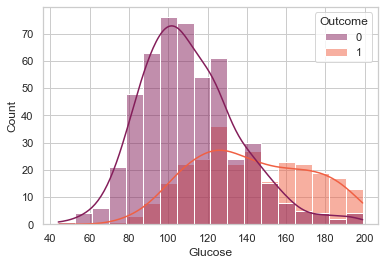

In [115]:
sns.histplot(x="Glucose", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

##### Glucose levels of diabetic people are very high

### Insulin with Outcome

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

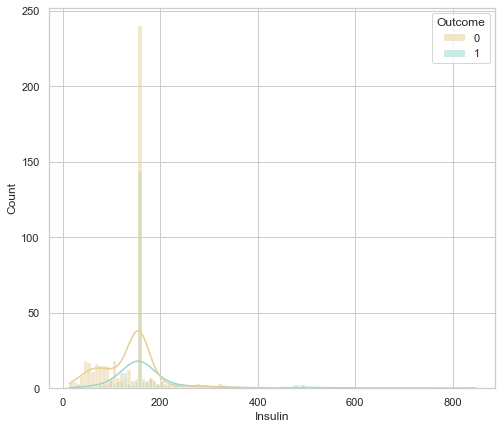

In [117]:
plt.figure(figsize=(8,7))
sns.histplot(x="Insulin", hue="Outcome", data=data, kde=True, palette=random.choice(pallete))

##### Diabetic people have a little more insulin.

# Ploting Pairwise relationship in the dataset

<Figure size 1440x1440 with 0 Axes>

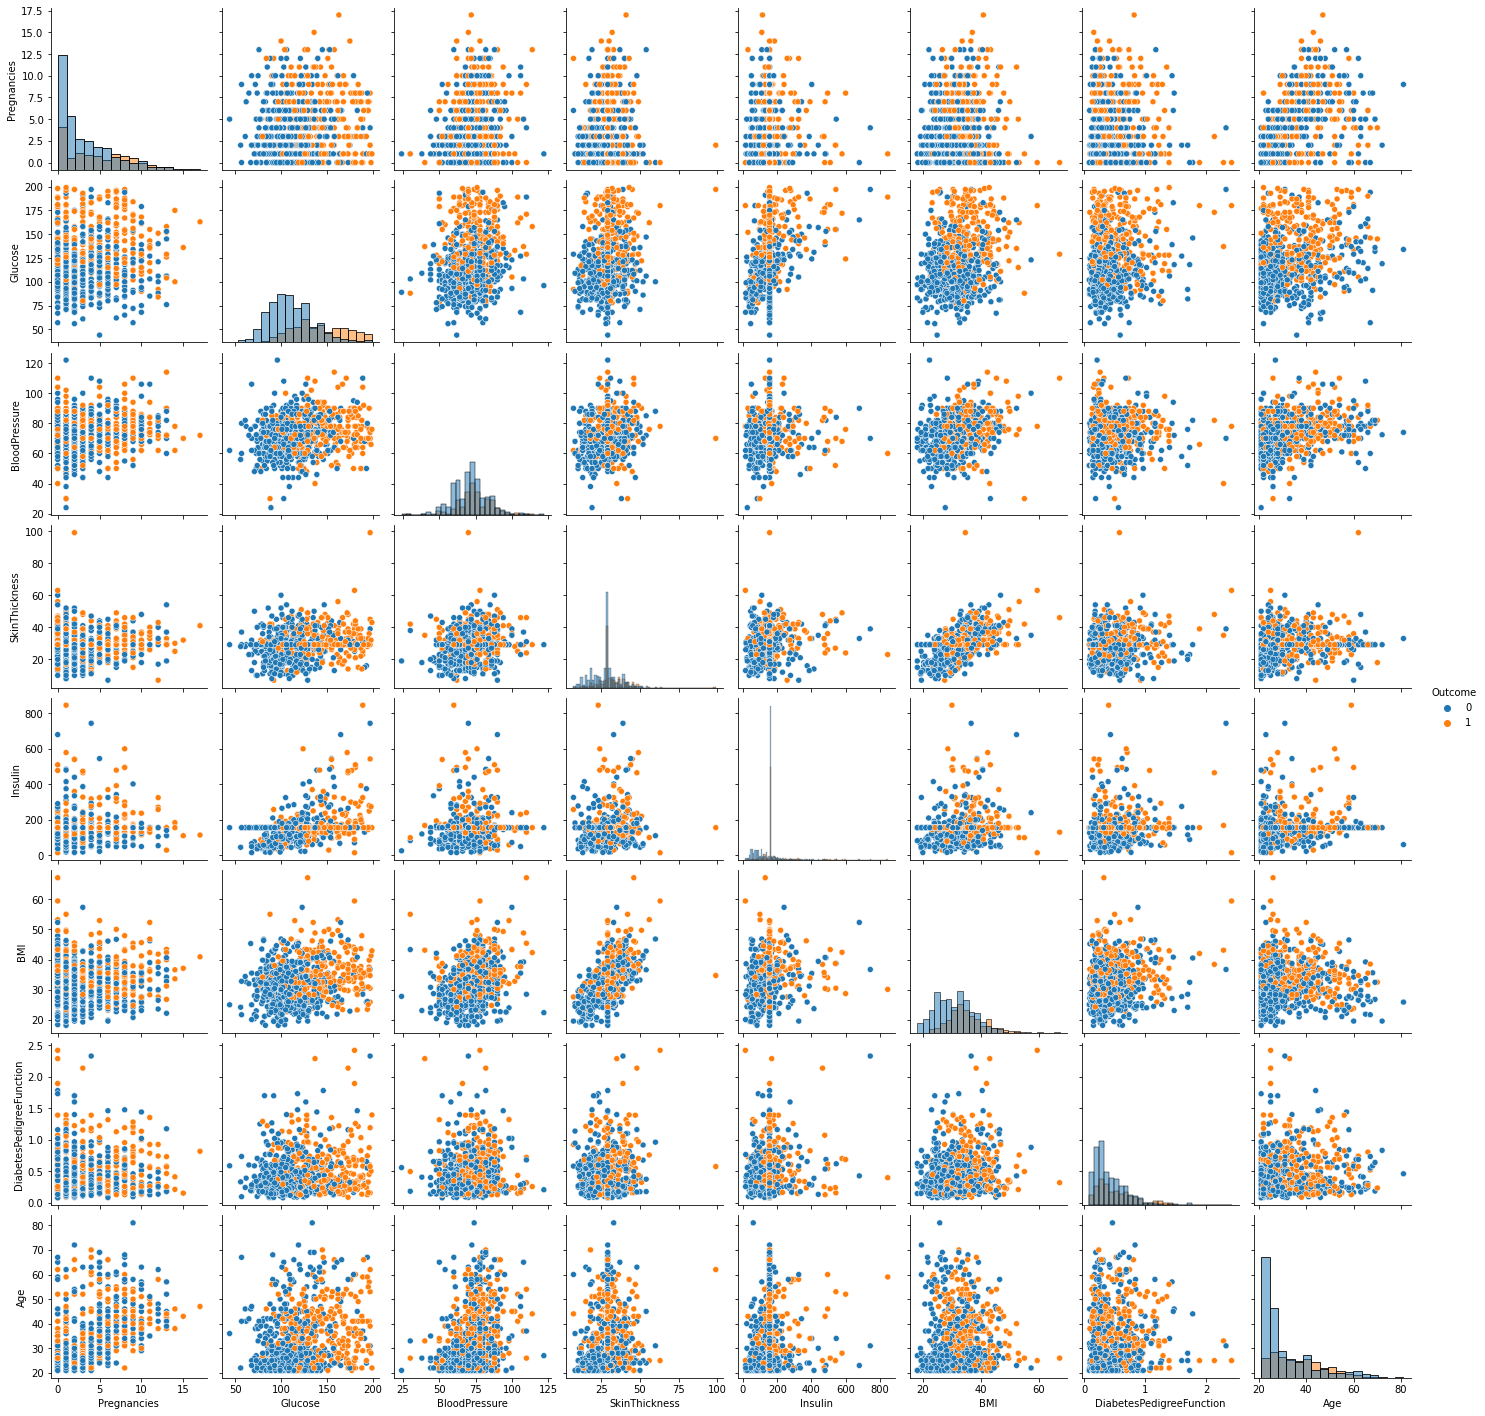

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships in a dataset
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(data=data, hue="Outcome", diag_kind="hist")
plt.show()


### Representing a bar plot based on the outcome

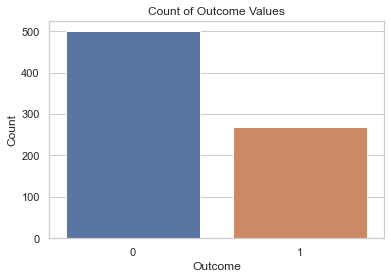

In [39]:
sns.set(style='whitegrid')

sns.countplot(x='Outcome', data=data) #Counts all the values for you and create a bar plot
plt.title('Count of Outcome Values')
plt.xlabel('Outcome')
plt.ylabel('Count')

plt.show()

# Conculsions from Data-set

1.There are no NaN values in the data.
2.As number  of pregnacies increase, more chance of being diabetic
3.The blood pressure levels of diabetic people are high
4.Glucose levels of diabetic people are very high.
5.Diabetic people have a little more insulin.
6.The distribution curve of insulin and DiabetesPedidgreeFunction(DPF) is right skewed(from plotting the pairwise relationship).
7.The BloodPressure lies between 40 and 100, and there are less number of people with diabetes in this range (from plotting the pairwise relationship).


From plotting the Pairwise relationship we can understand that:- 

1>Females with high glucose levels who are over the pregnancy threshold have diabetes.

2>Diabetes risk increases with both insulin and glucose levels.

3>The likelihood of developing diabetes increases with both BMI and glucose levels.

4>Age alone does not necessarily indicate diabetes.

5>It makes sense that middle-aged adults with high blood pressure and high glucose levels have a higher risk of developing diabetes.



### Scatter plot of Glucose vs Insulin with respect to Outcome

In [43]:
pip install plotly

     ---------------------------------------- 15.6/15.6 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:

import plotly.express as px
fig = px.scatter_3d(data, x='Glucose', y='Insulin', z='Outcome',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly_dark"})
fig.show()

### The Perceptron Algorithm

#### Using Hyperparameter Tuning specifaclly RandomSearchCV was able to get a basic idea of the best parameters which was needed to tune/optimize the model

In [95]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1,0.0001],
    'max_iter': [500, 1000, 1500]
}

# Create an MLP classifier
mlp = MLPClassifier(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

# Fit random search to your data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (Accuracy):", random_search.best_score_)


Best Hyperparameters: {'max_iter': 1500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (256, 128), 'alpha': 0.01, 'activation': 'logistic'}
Best Score (Accuracy): 0.7687724910035986


# Multi Layer Perceptron Algorithm

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Random Seed
torch.manual_seed(42)

# Assuming you have loaded and preprocessed your data

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define a custom MLP model with batch normalization and dropout
class CustomMLP(nn.Module):
    def __init__(self):
        super(CustomMLP, self).__init__()
        self.fc1 = nn.Linear(in_features=X_train.shape[1], out_features=64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch normalization
        self.relu1 = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.5)  # Dropout with 50% probability
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.bn2 = nn.BatchNorm1d(32)  # Batch normalization
        self.relu2 = nn.Sigmoid()
        self.dropout2 = nn.Dropout(0.5)  # Dropout with 50% probability
        self.fc3 = nn.Linear(in_features=32, out_features=2)  

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the model
model = CustomMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluation on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted.numpy())

print(f'Test Accuracy: {test_accuracy:.2f}')
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    _, train_predicted = torch.max(train_outputs, 1)

# Calculate the accuracy score for training data
train_accuracy = accuracy_score(y_train, train_predicted.numpy())
print(f'Training Accuracy: {train_accuracy:.2f}')

Test Accuracy: 0.75
Training Accuracy: 0.78


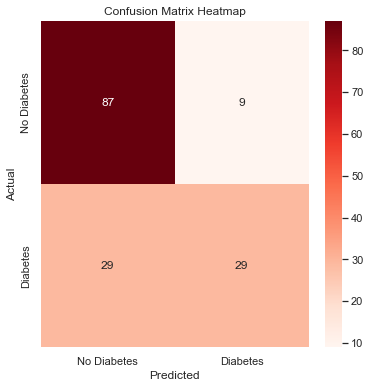

Test Accuracy: 0.75


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have trained your model as shown in your code

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted.numpy())

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", cbar=True,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
print(f'Test Accuracy: {test_accuracy:.2f}')

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have already trained your MLPClassifier and obtained predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)

# Calculate precision
precision = precision_score(y_test, predicted)

# Calculate recall
recall = recall_score(y_test, predicted)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.75
Precision: 0.76
Recall: 0.50
